In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creando la muestra

In [155]:
#data = pd.read_csv("data/AmazonProductReview.csv")
#data = pd.read_csv("/content/AmazonProductReview.csv")
data = pd.read_csv("data/Reviews.csv")

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [157]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [158]:
missing_values = ((data.isnull().sum())/len(data))*100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

# % DE DATOS FALTANTES POR COLUMNA
pd.set_option('display.max_rows', None)
print(missing_values)
pd.reset_option('display.max_rows')

Summary        0.004750
ProfileName    0.004574
dtype: float64


In [159]:
# Como podemos observar, hay muy pocos valores faltantes en las columnas "ProfileName" y "Summary", por lo que podemos eliminar esas filas sin problemas.
data = data.dropna(subset=['ProfileName', 'Summary'])

<Axes: xlabel='Score', ylabel='Count'>

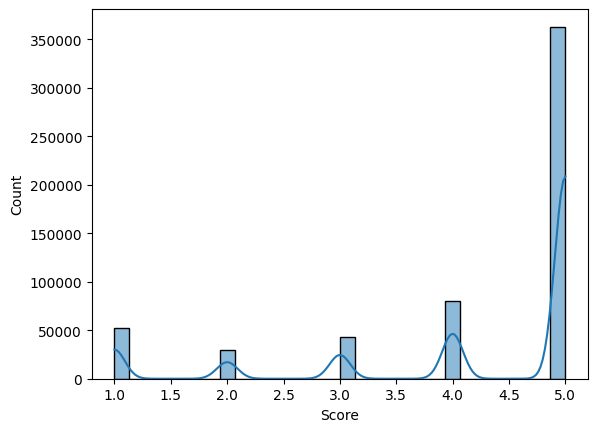

In [160]:
sns.histplot(data["Score"], bins=30, kde=True)
#Los datos se concentran en valores bajos, en especial el 0. Por lo que se realizara una imputacion de la mediana en esta columna


In [161]:
columns_to_drop = ['UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time']
df = data.drop(columns=columns_to_drop)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         568401 non-null  int64 
 1   ProductId  568401 non-null  object
 2   Score      568401 non-null  int64 
 3   Summary    568401 non-null  object
 4   Text       568401 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.0+ MB


In [163]:
df["Score"].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [164]:
df["Score"].value_counts(normalize=True)


Score
5    0.638813
4    0.141896
1    0.091949
3    0.075014
2    0.052327
Name: proportion, dtype: float64

In [165]:
#No hay duplicados
df.duplicated().sum()

0

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         568401 non-null  int64 
 1   ProductId  568401 non-null  object
 2   Score      568401 non-null  int64 
 3   Summary    568401 non-null  object
 4   Text       568401 non-null  object
dtypes: int64(2), object(3)
memory usage: 26.0+ MB


Text(0.5, 1.0, 'Distribución de Ratings')

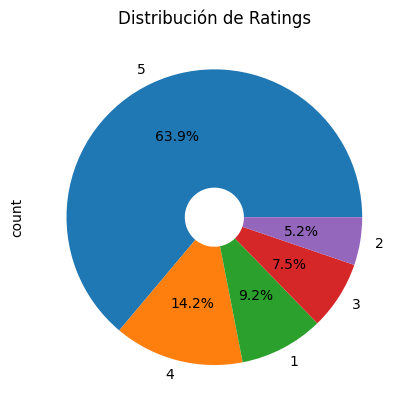

In [167]:
df["Score"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de Ratings")

In [168]:
df2= df.groupby('Score').apply(lambda x: x.sample(1000)).reset_index(drop=True)

C:\Users\karim\AppData\Local\Temp\ipykernel_55376\3093762579.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df2= df.groupby('Score').apply(lambda x: x.sample(1000)).reset_index(drop=True)


In [169]:
df2=df2.sort_values(by='Id', ascending=True).reset_index(drop=True)
df2

,Id,ProductId,Score,Summary,Text
0,149,B0064KU9HO,3,Ehhh...,These remind me of dog treats I made once usin...
1,212,B0009XLVGA,5,Great For Fat Cats and Senior Citizens,"We have three cats, the youngest is about elev..."
2,217,B002TDK0VK,1,Price cannot be correct,"Hey, the description says 360 grams - that is ..."
3,545,B000G6RYNE,1,"Stale, Rancid Oil Taste, And if You Like Even ...",...you can absolutely forget about these. Conf...
4,629,B000G6RYNE,3,Not low salt,These chips are tasty but not what I expected ...
...,...,...,...,...,...
4995,567908,B005K4Q68Q,2,hot chocolate,I thought the Grove hot chocolate is to sweet....
4996,568049,B0030VJ8YU,1,Icky mama grain,"First, the other happy baby flavors have been ..."
4997,568180,B001VNKW76,3,product,Please send me the right order I requested ful...
4998,568295,B001682QCK,1,NOT THE NESTLES CHOCOLATE I KNEW AS A KID-- DO...,THE NESTLES CHOCOLATE BAR DOES NOT TASTE AT AL...


## Usando la muestra balanceada

In [81]:
#df2.to_csv("data/AmazonProductReview.csv", index=False)
df2 = pd.read_csv("data/AmazonProductReview.csv")

Text(0.5, 1.0, 'Distribución de Ratings')

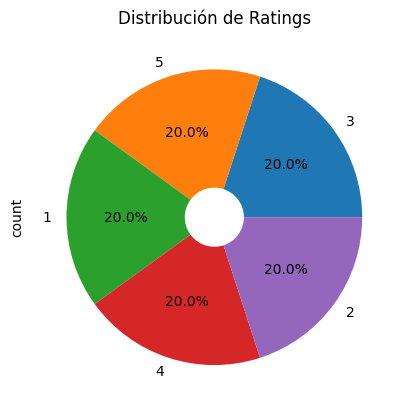

In [82]:
df2["Score"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de Ratings")

In [83]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         5000 non-null   int64 
 1   ProductId  5000 non-null   object
 2   Score      5000 non-null   int64 
 3   Summary    5000 non-null   object
 4   Text       5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [84]:
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [85]:
def remove_html(texto):
  
    return re.sub(r'<[^>]+>', '', texto)

def remove_urls(texto):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', texto)

def Tokenizador(texto):
    doc = nlp(texto)
    lista_tokens=[word.text.strip().lower() for word in doc if len(word.text.strip()) > 0]
    return lista_tokens

def remove_words(textoTokenizado):
    doc = nlp(" ".join(textoTokenizado))
    TextoLimpioTokenizado = [word.text for word in doc if (not word.is_stop | word.is_punct) and word.orth_ != ' ']
    return TextoLimpioTokenizado

def lematizador(TextoLimpioTokenizado):
    doc = nlp(" ".join(TextoLimpioTokenizado))
    #listaTokensLematizados=[word.lemma_ for word in doc]
    listaTokensLematizados=[word.lemma_ for word in doc if len(word.text)>2]
    return listaTokensLematizados

#Normalizador
def Pipeline(texto):
    texto= remove_html(texto)
    texto=remove_urls(texto)
    lista_tokens = Tokenizador(texto)
    TextoLimpioTokenizado = remove_words(lista_tokens)
    listaTokensLematizados = lematizador(TextoLimpioTokenizado)
    return listaTokensLematizados

In [86]:
#df2['ReviewTitulo_procesado'] = df2['Summary'].apply(Pipeline)
df2['ReviewTexto_procesado'] = df2['Text'].apply(Pipeline)

KeyboardInterrupt: 

In [ ]:
df2.head(9)

,Id,ProductId,Score,Summary,Text,ReviewTitulo_procesado,ReviewTexto_procesado,Sentimiento,JoinedReviewProcesada
0,149,B0064KU9HO,3,Ehhh...,These remind me of dog treats I made once usin...,[ehhh],"[remind, dog, treat, pumpkin, cinnamon, kind, ...",Neutral,remind dog treat pumpkin cinnamon kind bland f...
1,212,B0009XLVGA,5,Great For Fat Cats and Senior Citizens,"We have three cats, the youngest is about elev...","[great, fat, cat, senior, citizen]","[cat, young, year, old, old, ancient, vet, tel...",Positivo,cat young year old old ancient vet tell year a...
2,217,B002TDK0VK,1,Price cannot be correct,"Hey, the description says 360 grams - that is ...","[price, correct]","[hey, description, say, 360, gram, roughly, ou...",Negativo,hey description say 360 gram roughly 13 ounce ...
3,545,B000G6RYNE,1,"Stale, Rancid Oil Taste, And if You Like Even ...",...you can absolutely forget about these. Conf...,"[stale, rancid, oil, taste, like, tiny, bit, s...","[absolutely, forget, confirm, reviewer, chip, ...",Negativo,absolutely forget confirm reviewer chip total ...
4,629,B000G6RYNE,3,Not low salt,These chips are tasty but not what I expected ...,"[low, salt]","[chip, tasty, expect, low, salt, item, salty, ...",Neutral,chip tasty expect low salt item salty regular ...
5,1046,B001HTKS1Y,3,somewhat sweet,i bought the liter size bottles of this dressi...,"[somewhat, sweet]","[buy, liter, size, bottle, dress, amazon, assu...",Neutral,buy liter size bottle dress amazon assume nutr...
6,1049,B0018AMWES,4,Good product - better price elsewhere,This is a cute product to use in place of spri...,"[good, product, well, price]","[cute, product, use, place, sprinkle, bright, ...",Positivo,cute product use place sprinkle bright color c...
7,1354,B0046HFHD8,3,Difficult to review.,"I sent this product to my brother in law, so I...","[difficult, review]","[send, product, brother, law, see, product, kn...",Neutral,send product brother law see product know hear...
8,1448,B001E50UEQ,2,"Not a lot of flavor, not a lot of chicken",This is a starchy soup rather than the meal po...,"[lot, flavor, lot, chicken]","[starchy, soup, meal, portray, outside, little...",Negativo,starchy soup meal portray outside little taste...


In [ ]:
def sentimiento(rating):
    if rating >= 4:
        return "Positivo"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negativo"

df2["Sentimiento"] = df2["Score"].apply(sentimiento)

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

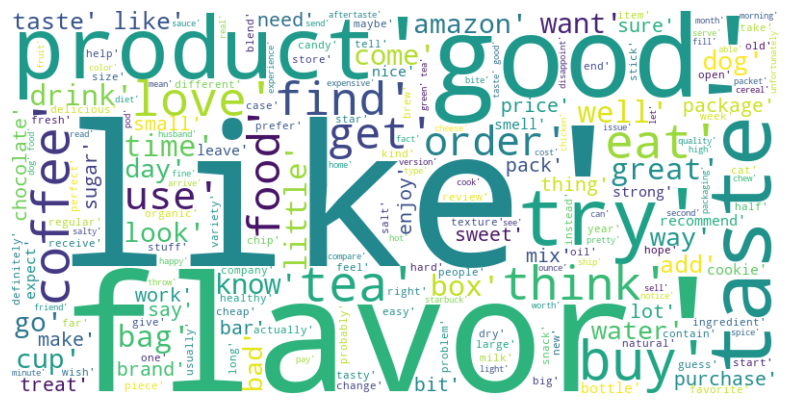

In [ ]:
texto_titulos = " ".join(review for review in df2["ReviewTexto_procesado"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
top =df2["ProductId"].value_counts(normalize=1)*100
top

ProductId
B000KV7ZGQ    0.26
B006MONQMC    0.18
B005HG9ESG    0.18
B007M832YY    0.18
B0090X8IPM    0.18
              ... 
B000GW0U66    0.02
B004IJT8VG    0.02
B001BX4U2E    0.02
B001BORBMY    0.02
B003XUL27E    0.02
Name: proportion, Length: 3686, dtype: float64

In [ ]:
top.keys()[:5]

Index(['B000KV7ZGQ', 'B006MONQMC', 'B005HG9ESG', 'B007M832YY', 'B0090X8IPM'], dtype='object', name='ProductId')

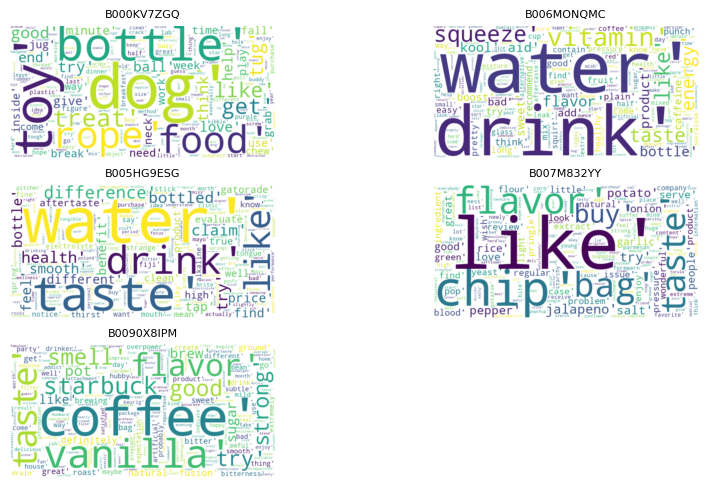

In [229]:
plt.figure(figsize=(10,10))
for i,producto in enumerate(top.keys()[:5]):
    plt.subplot(5,2,i+1)
    texto_titulos = " ".join(review for review in df2[df2["ProductId"]==producto]["ReviewTexto_procesado"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_titulos)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(producto,fontsize =8)
    plt.axis('off')
    #plt.show()



<Axes: ylabel='Score'>

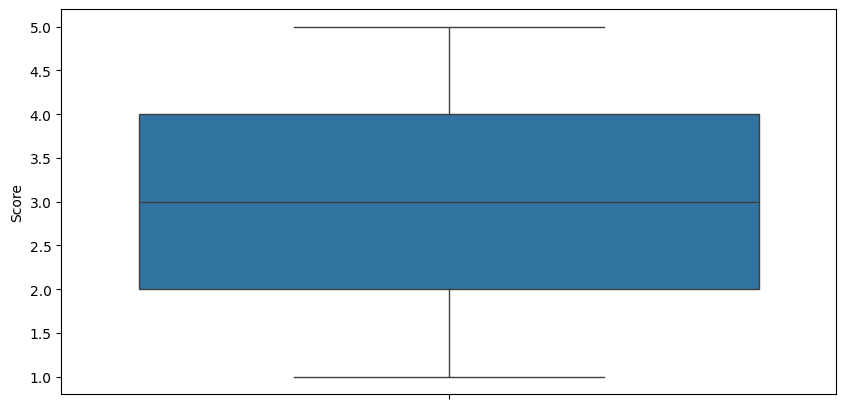

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df2,y="Score")

Text(0.5, 1.0, 'Distribución de sentimientos')

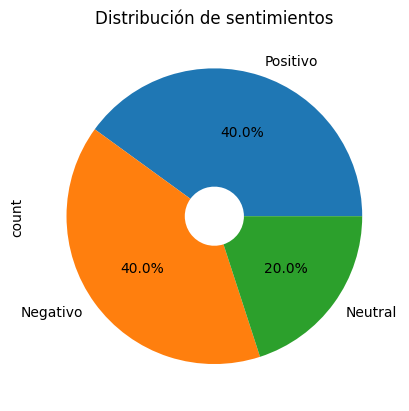

In [ ]:
df2["Sentimiento"].value_counts().plot(kind ="pie" , autopct='%1.1f%%', explode=(0,0,0), wedgeprops=dict(width=0.8))
plt.title("Distribución de sentimientos")

In [ ]:
df2['JoinedReviewProcesada'] = df2['ReviewTexto_procesado'].apply(lambda x: " ".join(x))

In [ ]:
df2

,Id,ProductId,Score,Summary,Text,ReviewTitulo_procesado,ReviewTexto_procesado,Sentimiento,JoinedReviewProcesada
0,149,B0064KU9HO,3,Ehhh...,These remind me of dog treats I made once usin...,[ehhh],"[remind, dog, treat, pumpkin, cinnamon, kind, ...",Neutral,remind dog treat pumpkin cinnamon kind bland f...
1,212,B0009XLVGA,5,Great For Fat Cats and Senior Citizens,"We have three cats, the youngest is about elev...","[great, fat, cat, senior, citizen]","[cat, young, year, old, old, ancient, vet, tel...",Positivo,cat young year old old ancient vet tell year a...
2,217,B002TDK0VK,1,Price cannot be correct,"Hey, the description says 360 grams - that is ...","[price, correct]","[hey, description, say, 360, gram, roughly, ou...",Negativo,hey description say 360 gram roughly ounce 4.0...
3,545,B000G6RYNE,1,"Stale, Rancid Oil Taste, And if You Like Even ...",...you can absolutely forget about these. Conf...,"[stale, rancid, oil, taste, like, tiny, bit, s...","[absolutely, forget, confirm, reviewer, chip, ...",Negativo,absolutely forget confirm reviewer chip total ...
4,629,B000G6RYNE,3,Not low salt,These chips are tasty but not what I expected ...,"[low, salt]","[chip, tasty, expect, low, salt, item, salty, ...",Neutral,chip tasty expect low salt item salty regular ...
...,...,...,...,...,...,...,...,...,...
4995,567908,B005K4Q68Q,2,hot chocolate,I thought the Grove hot chocolate is to sweet....,"[hot, chocolate]","[think, grove, hot, chocolate, sweet, taste, r...",Negativo,think grove hot chocolate sweet taste recommen...
4996,568049,B0030VJ8YU,1,Icky mama grain,"First, the other happy baby flavors have been ...","[icky, mama, grain]","[happy, baby, flavor, hit, baby, mama, grain, ...",Negativo,happy baby flavor hit baby mama grain indescri...
4997,568180,B001VNKW76,3,product,Please send me the right order I requested ful...,[product],"[send, right, order, request, clove, send, pow...",Neutral,send right order request clove send powdered k...
4998,568295,B001682QCK,1,NOT THE NESTLES CHOCOLATE I KNEW AS A KID-- DO...,THE NESTLES CHOCOLATE BAR DOES NOT TASTE AT AL...,"[nestle, chocolate, know, kid--, not, waste, m...","[nestle, chocolate, bar, taste, like, kid!the,...",Negativo,nestle chocolate bar taste like kid!the rich v...


In [ ]:
df_main = df2[["Id","JoinedReviewProcesada","Score","Sentimiento",]].copy()

In [233]:
df_main[['Id',"JoinedReviewProcesada"]].iloc[2].values

array([217,
       'hey description say 360 gram roughly ounce 4.00 way approximate price 100 gram'],
      dtype=object)

In [234]:
df2[["Id","Text"]].iloc[2].values

array([217,
       'Hey, the description says 360 grams - that is roughly 13 ounces at under $4.00 per can. No way - that is the approximate price for a 100 gram can.'],
      dtype=object)

In [ ]:
df_main = df_main.loc[:,["JoinedReviewProcesada","Sentimiento"]]

## Modelado

In [107]:
import pandas as pd
#df_main.to_csv("data/DataForModeling.csv", index=False)
df_main = pd.read_csv("data/DataForModeling.csv")

In [108]:
from sklearn.model_selection import train_test_split


In [109]:
X = df_main["JoinedReviewProcesada"]
y = df_main["Sentimiento"].map({"Positivo":2,"Negativo":0,"Neutral":1})

In [110]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [111]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42,stratify=y_train)

In [97]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")




In [112]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # 3 etiquetas: positivo, negativo, neutral


loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at C:\Users\karim/.cache\huggingface\transformers\45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at C:\Users\karim/.cache\huggingface\transformers\c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.76ea01b4b85ac16e2cec55c398cba7a943d89ab21dfdd973f6630a152e4b9aed
loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at C:\Users\karim/.cache\huggingface\transformers\3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005b

In [113]:
#Hallamos la longitud promedio de las reviews
train_lens = [len(i.split()) for i in X] 
print("Mean length: ", np.mean(train_lens))

Mean length:  36.334


In [114]:
def tokenize_function(texts):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    )

train_encodings = tokenize_function(x_train)
val_encodings = tokenize_function(x_val)
test_encodings = tokenize_function(x_test)

In [115]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.values

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crear los datasets
train_dataset = SentimentDataset(train_encodings, y_train)
val_dataset = SentimentDataset(val_encodings, y_val)
test_dataset = SentimentDataset(test_encodings, y_test)


In [118]:
training_args = TrainingArguments(
    output_dir='./results',         
    num_train_epochs=3,             
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=64,   
    warmup_steps=500,               
    weight_decay=0.01,              
    logging_steps=10,
    evaluation_strategy="epoch",    
    save_strategy="epoch",
    load_best_model_at_end=True,
    fp16=True,  
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
trainer = Trainer(model=model, args=training_args, train_dataset=train_dataset, eval_dataset=val_dataset)

trainer.train()

In [104]:
trainer.evaluate(test_dataset)

***** Running Evaluation *****
  Num examples = 600
  Batch size = 64
c:\Users\karim\anaconda3\envs\DataScience\Lib\site-packages\transformers\trainer.py:1949: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  ctx_manager = autocast(dtype=self.amp_dtype)


  0%|          | 0/10 [00:00<?, ?it/s]

{'eval_loss': 0.9261423945426941,
 'eval_runtime': 13.0984,
 'eval_samples_per_second': 45.807,
 'eval_steps_per_second': 0.763,
 'epoch': 3.0}

In [105]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [106]:
y_true = [item['labels'].item() for item in test_dataset]


predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=-1)

print(classification_report(y_true, y_pred, target_names=["Positivo", "Negativo", "Neutral"]))

***** Running Prediction *****
  Num examples = 600
  Batch size = 64


  0%|          | 0/10 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    Positivo       0.57      0.77      0.65       200
    Negativo       0.47      0.29      0.36       200
     Neutral       0.64      0.66      0.65       200

    accuracy                           0.57       600
   macro avg       0.56      0.57      0.55       600
weighted avg       0.56      0.57      0.55       600



In [74]:
print("Accuracy: ",accuracy_score(y_true, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_true, y_pred))

Accuracy:  0.653
Confusion Matrix: 
 [[297  63  40]
 [ 77  56  67]
 [ 50  50 300]]


<Axes: >

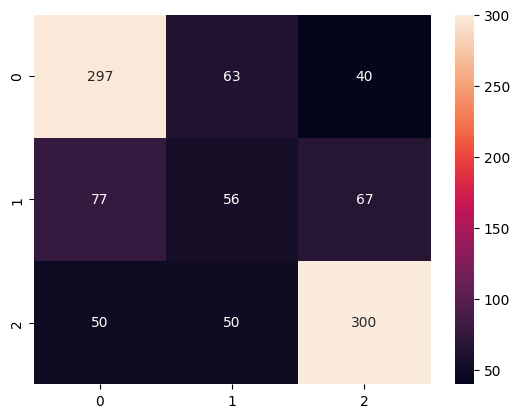

In [75]:
sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt="d")

In [ ]:
# Guardar modelo y tokenizer en una carpeta
trainer.save_model("/modelo/bert1")  # Cambia "path_to_save_model" por tu ruta deseada
tokenizer.save_pretrained("/modelo/tokenizer1")


Saving model checkpoint to /modelo/bert1
Configuration saved in /modelo/bert1\config.json
Model weights saved in /modelo/bert1\pytorch_model.bin
tokenizer config file saved in /modelo/tokenizer1\tokenizer_config.json
Special tokens file saved in /modelo/tokenizer1\special_tokens_map.json


('/modelo/tokenizer1\\tokenizer_config.json',
 '/modelo/tokenizer1\\special_tokens_map.json',
 '/modelo/tokenizer1\\vocab.txt',
 '/modelo/tokenizer1\\added_tokens.json')

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizerFast

# Cargar modelo y tokenizer
model = BertForSequenceClassification.from_pretrained("/modelo/bert1")
tokenizer = BertTokenizerFast.from_pretrained("/modelo/tokenizer1")